In [1]:
# Decision Tree Regression

In [2]:
# Dataset:  Petrol_Consumption.csv
# Location: https://mitu.co.in/dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('petrol_consumption.csv')

In [7]:
df.shape

(48, 5)

In [9]:
df.corrwith(df['Petrol_Consumption'])

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
dtype: float64

In [10]:
# input data
x = df.drop('Petrol_Consumption', axis = 1)

# output data
y = df['Petrol_Consumption']

In [11]:
x.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
count,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333
std,0.950770,573.623768,3491.507166,0.055470
min,5.000000,3063.000000,431.000000,0.451000
25%,7.000000,3739.000000,3110.250000,0.529750
50%,7.500000,4298.000000,4735.500000,0.564500
75%,8.125000,4578.750000,7156.000000,0.595250
max,10.000000,5342.000000,17782.000000,0.724000


In [12]:
x.shape

(48, 4)

In [13]:
# Cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [14]:
x_train.shape

(36, 4)

In [15]:
x_test.shape

(12, 4)

In [16]:
# Import the class
from sklearn.tree import DecisionTreeRegressor

In [17]:
# Create the object
regressor = DecisionTreeRegressor(random_state=0)

In [18]:
# Train the algorithm
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
# Find the MAE?
y_pred = regressor.predict(x_test)

In [22]:
sum(abs(y_pred - y_test)) / len(y_test)

68.08333333333333

In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [24]:
mean_absolute_error(y_test, y_pred)

68.08333333333333

In [27]:
1.0 - mean_absolute_percentage_error(y_test, y_pred)

0.8705996385150547

In [29]:
new = [[8.00,4399,431,0.544]]

In [30]:
regressor.predict(new)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([498.])

In [31]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [32]:
result

,actual,predicted
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

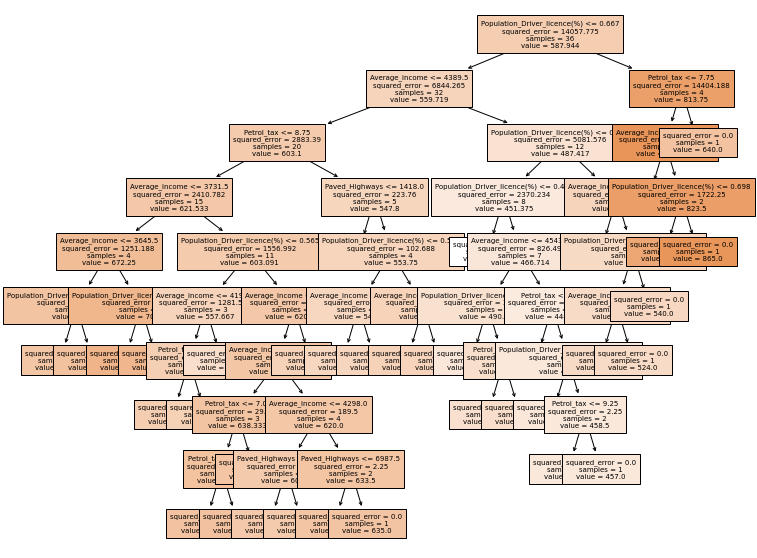

In [38]:
plt.figure(figsize=(12,10))
plot_tree(regressor, filled=True, fontsize=7, 
         feature_names=x.columns);